In [1]:
import pandas as pd

# Load the data
data = pd.read_csv("raw_data_beforeencode.csv")

data.head()

,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,capped_incurred,business_provider,cover,voluntary_xs,ncd,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,primary_car_colour,vehicle_purchase_year,licence_test_year
0,0.002740,0.00000,0.0000,0,0.0,0.0,CTMDefaultCampaign,COMP,250,0,...,Other,20,20,1,MANUAL,Other,Male,Blue,4,7
1,1.000000,238.33650,238.3365,0,0.0,0.0,CTMDefaultCampaign,COMP,0,7,...,FORD,25,25,1,MANUAL,South East,Female,Grey,6,11
2,0.420765,77.31347,183.7450,0,0.0,0.0,CTMDefaultCampaign,COMP,50,9,...,PEUGEOT,42,42,1,MANUAL,West Midlands,Female,Silver,7,29
3,1.000000,494.98150,246.5586,0,0.0,0.0,Other,COMP,100,0,...,Other,31,31,1,AUTOMATIC,North West,Female,White,4,4
4,1.000000,120.05060,120.0506,0,0.0,0.0,MSMDefaultCampaign,COMP,250,9,...,Other,61,61,1,MANUAL,South West,Male,Silver,10,49


In [2]:
# Perform one-hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)

data_encoded.head()

,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,capped_incurred,voluntary_xs,ncd,vehicle_value,vehicle_annual_mileage,...,region_Yorkshire,gender_Female,gender_Male,gender_Unknown,primary_car_colour_Black,primary_car_colour_Blue,primary_car_colour_Grey,primary_car_colour_Other,primary_car_colour_Silver,primary_car_colour_White
0,0.002740,0.00000,0.0000,0,0.0,0.0,250,0,1050,5000.0,...,0,0,1,0,0,1,0,0,0,0
1,1.000000,238.33650,238.3365,0,0.0,0.0,0,7,3000,4000.0,...,0,1,0,0,0,0,1,0,0,0
2,0.420765,77.31347,183.7450,0,0.0,0.0,50,9,2500,4000.0,...,0,1,0,0,0,0,0,0,1,0
3,1.000000,494.98150,246.5586,0,0.0,0.0,100,0,645,2000.0,...,0,1,0,0,0,0,0,0,0,1
4,1.000000,120.05060,120.0506,0,0.0,0.0,250,9,3145,8000.0,...,0,0,1,0,0,0,0,0,1,0


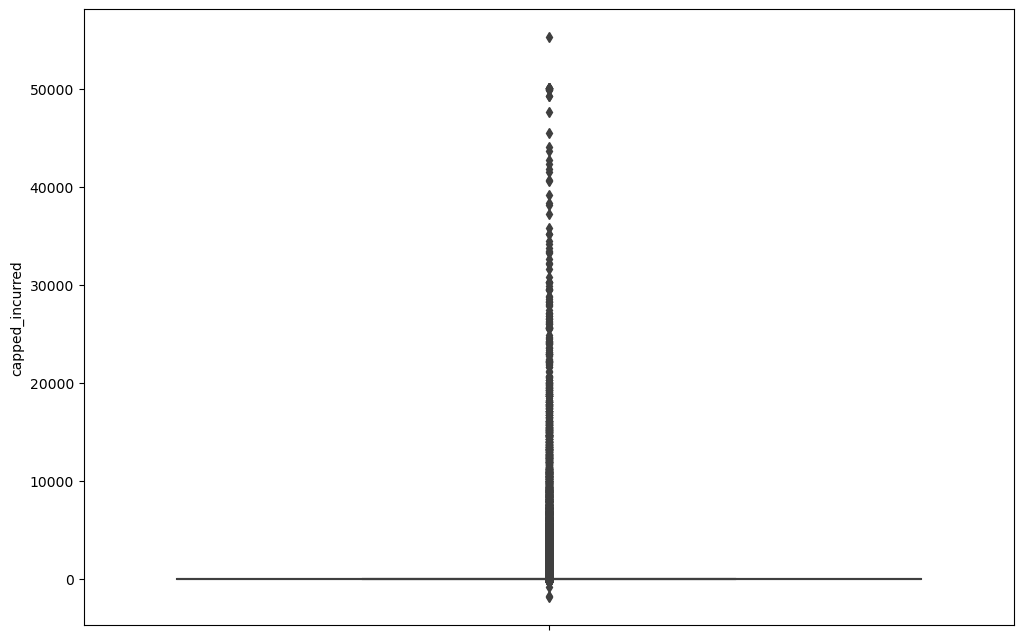

In [3]:
# Deal with Outliers
# Create a boxplot for 'capped_incurred'
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(y=data_encoded['capped_incurred'])

# Display the plot
plt.show()

In [4]:
from scipy.stats import mstats
# Apply Winsorization to the 'capped_incurred' column
data_encoded['capped_incurred_winsorized'] = mstats.winsorize(data_encoded['capped_incurred'], limits=[0, 0.05])
data_winsorized = data_encoded.drop('capped_incurred', axis=1)

In [5]:
# Select features
from sklearn.ensemble import RandomForestRegressor

X = data_winsorized.drop(columns='capped_incurred_winsorized')
y = data_winsorized['capped_incurred_winsorized']

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

top_features = feature_importances.sort_values(ascending=False).head(10)
top_features

claim_count               0.177922
vehicle_value             0.177898
net_earned_premium        0.105792
net_written_premium       0.060561
vehicle_age               0.040928
vehicle_annual_mileage    0.036353
exposure                  0.034973
licence_test_year         0.032890
d1_residency_years        0.027911
d1_age                    0.027308
dtype: float64

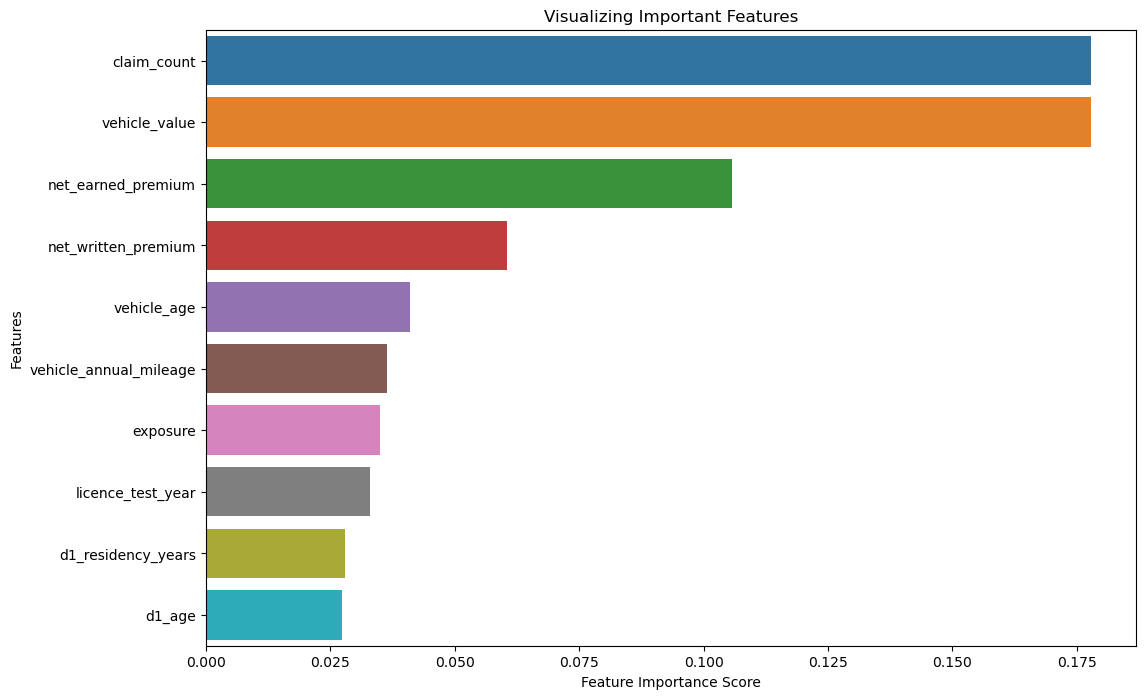

In [6]:
# Create a bar plot of feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=top_features, y=top_features.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')

# Display the plot
plt.show()

In [7]:
# Predict Claim Amount 
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_top = X[top_features.index]

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Train a Random Forest model 
rf_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top.fit(X_train, y_train)

y_predict_rf = rf_top.predict(X_test)

mse = mean_squared_error(y_test, y_predict_rf)
mse

285.8744371586201

In [ ]:
####### Question #########
# Declaring Residency Year - 5 Years
# Declaring License Year - 15 Years

